In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

FN_INPUT = '/Users/sheilaiyer/resources/my_biastools/new.bt.bias'
FN_FIG = 'combined_ref_bi.txt'

df = pd.read_csv(FN_INPUT, sep='\t')
df_merged_final = df[(df['NUM_READS']) >= 15]
#df_hapA.rename(columns={"REFERENCE_BIAS":"HAP_A_REFERENCE_BIAS", "REF_COUNT": "HAP_A_REF_COUNT", "ALT_COUNT": "HAP_A_ALT_COUNT", 
#                   "GAP_COUNT": "HAP_A_GAP_COUNT", "OTHER_COUNT": "HAP_A_OTHER_COUNT", 
#                   "NUM_READS": "HAP_A_NUM_READS", "SUM_MAPQ": "HAP_A_SUM_MAPQ"}, inplace = True)
df_merged_final.head()


,CHR,HET_SITE,REFERENCE_BIAS,REF_COUNT,ALT_COUNT,GAP_COUNT,OTHER_COUNT,NUM_READS,SUM_MAPQ,READ_DISTRIBUTION
0,chr21,5063904,0.480769,25,27,0,0,52,651,0.480769
1,chr21,5063917,0.479167,23,25,0,0,48,632,0.479167
2,chr21,5216337,0.516129,16,15,0,0,31,1302,0.516129
3,chr21,5218151,0.483871,15,16,0,1,32,1344,0.468750
4,chr21,5218669,0.512195,21,20,0,0,41,1722,0.512195


0.01    0.314286
0.10    0.400000
0.25    0.448276
0.50    0.500000
0.75    0.553191
0.90    0.605263
0.99    0.727273
Name: REFERENCE_BIAS, dtype: float64
mean:  0.5030842715588969


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Counts')

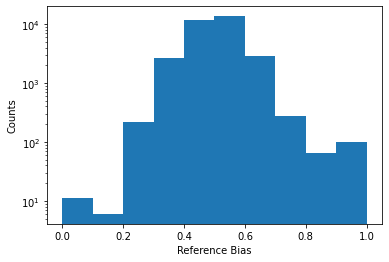

In [30]:
import numpy as np

rb = df_merged_final['REFERENCE_BIAS']
if 'NaN' in rb:
    print("true")

#: show stats
print (rb.quantile(q=[.01, .1, 0.25,0.5,0.75, .90, .99]))
print("mean: ", np.mean(rb))

plt.clf()
plt.hist(rb)
plt.yscale('log')
plt.xlabel('Reference Bias')
plt.ylabel('Counts')
#plt.title(TITLE)
#plt.savefig(FN_FIG)

Text(0.5, 1.0, 'Reference Bias Distribution of HET sites with Reference Bias >= 0.80')

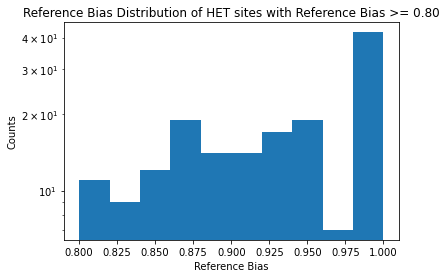

In [31]:
df_eighty = df_merged_final[df_merged_final['REFERENCE_BIAS'] >= 0.80]
df_eighty_refbi = df_eighty['REFERENCE_BIAS']
#print(len(df_eighty_refbi))

title = 'Reference Bias Distribution of HET sites with Reference Bias >= 0.80'
plt.clf()
plt.hist(df_eighty_refbi)
plt.yscale('log')
plt.xlabel('Reference Bias')
plt.ylabel('Counts')
plt.title(title)

In [32]:
def map_mapq_to_size(mapq):
    if mapq >= 40:
        return 0
    elif mapq >= 30:
        return 1
    elif mapq >= 20:
        return 2
    elif mapq >= 10:
        return 3
    elif mapq >= 5:
        return 4
    elif mapq >= 3:
        return 5
    elif mapq >= 1:
        return 6
    return 7

<ipython-input-33-9b50f290f132>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eighty['AVERAGE_MAPQ'] = df_eighty['SUM_MAPQ']/(df_eighty['NUM_READS'])


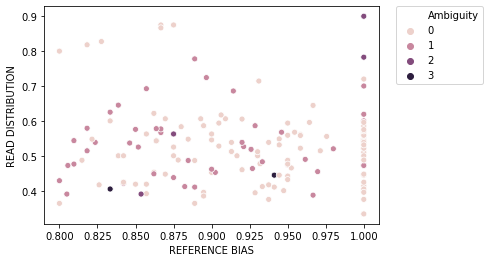

In [33]:
sp = pd.DataFrame()

# Add columns
df_eighty['AVERAGE_MAPQ'] = df_eighty['SUM_MAPQ']/(df_eighty['NUM_READS'])
mapQ = list(df_eighty['AVERAGE_MAPQ'])

sp['REFERENCE BIAS'] = list(df_eighty_refbi)
sp['READ DISTRIBUTION'] = list(df_eighty['READ_DISTRIBUTION'])
sp.head()

mapped_mapQ = [map_mapq_to_size(q) for q in mapQ]
sp['Ambiguity'] = mapped_mapQ
sp['MapQ'] = list(mapQ)
#sp['# Variants'] = list(size_in['# Variants']+1)

#ax = sns.scatterplot(x="REFERENCE BIAS", y="Read Distribution",  hue = "Ambiguity", size = "# Variants", data = sp)#hue="size", size="size", data=tips)
ax = sns.scatterplot(x="REFERENCE BIAS", y="READ DISTRIBUTION",  hue = "Ambiguity", data = sp)#hue="size", size="size", data=tips)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
df_merged = pd.merge(df_hapA, df_hapB,  how='left', left_on=['CHR','HET_SITE'], right_on = ['CHR','HET_SITE'])
df_merged_final = df_merged[(df_merged['HAP_A_NUM_READS']+df_merged['HAP_B_NUM_READS']) >= 15]
df_merged_final['Overall_Reference_Bias'] = (df_merged_final['HAP_A_REF_COUNT']+df_merged_final['HAP_B_REF_COUNT'])/(df_merged_final['HAP_A_REF_COUNT']+df_merged_final['HAP_B_REF_COUNT']+df_merged_final['HAP_A_ALT_COUNT']+df_merged_final['HAP_B_ALT_COUNT'])

df_merged_final.head()


In [ ]:
FN_INPUT2 = '/Users/sheilaiyer/resources/biastools/hapB_ref_bi.txt'

df_hapB = pd.read_csv(FN_INPUT2, sep='\t')
df_hapB.rename(columns={"REFERENCE_BIAS":"HAP_B_REFERENCE_BIAS", "REF_COUNT": "HAP_B_REF_COUNT", "ALT_COUNT": "HAP_B_ALT_COUNT", 
                   "GAP_COUNT": "HAP_B_GAP_COUNT", "OTHER_COUNT": "HAP_B_OTHER_COUNT", 
                   "NUM_READS": "HAP_B_NUM_READS", "SUM_MAPQ": "HAP_B_SUM_MAPQ"}, inplace = True)
df_hapB.head()


In [ ]:
FN_INPUT3 = '/Users/sheilaiyer/resources/biastools/chr21_het.vcf'

df_het = pd.read_csv(FN_INPUT3, comment = "#", sep = '\t', header = None, usecols = [0, 1, 9])
df_het.head()
read_distribution = list()
list_geno = list(df_het[9])
hapA_reads = list(df_eighty['HAP_A_NUM_READS'])
hapB_reads = list(df_eighty['HAP_B_NUM_READS'])
read_dis = 0.0;

for i in range(len(list_geno)):
    #print(df_het[1][i])
    #print(df_eighty.HET_SITE)
    if (df_het[1][i] in list(df_eighty.HET_SITE)):
        if(list_geno[i] == "0|1"):
            read_dis = hapA_reads[i]/(hapA_reads[i]+hapB_reads[i])
            read_distribution.append(read_dis)
        else:
            read_dis = hapB_reads[i]/(hapA_reads[i]+hapB_reads[i])
            read_distribution.append(read_dis)

print(len(read_distribution))
